<h2 align='center'>NLP : Text Representation - Bag Of Words (BOW)</h2>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0) # new colum for spam is 1 and not spam is 0

In [6]:
df.shape

(5572, 3)

In [7]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<h3>Train test split</h3>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [10]:
X_train.shape

(4457,)

In [11]:
X_test.shape

(1115,)

In [12]:
type(X_train)

pandas.core.series.Series

In [13]:
X_train[:4]

4096    I ain't answerin no phone at what is actually ...
689            Thanks love. But am i doing torch or bold.
286     K, I might come by tonight then if my class le...
4391    Do you know why god created gap between your f...
Name: Message, dtype: object

In [14]:
type(y_train)

pandas.core.series.Series

In [15]:
y_train[:4]

4096    0
689     0
286     0
4391    0
Name: spam, dtype: int64

In [16]:
type(X_train.values)

numpy.ndarray

<h3>Create bag of words representation using CountVectorizer</h3>

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values) # X_train.values --> numpy array
X_train_cv

# creating vector count of each word in the data

<4457x7631 sparse matrix of type '<class 'numpy.int64'>'
	with 59424 stored elements in Compressed Sparse Row format>

In [19]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
X_train_cv.shape # 7783 words in vocabulary

(4457, 7631)

In [21]:
v.get_feature_names_out()[1000:1050]

array(['applausestore', 'applebees', 'apples', 'application', 'apply',
       'applyed', 'applying', 'appointment', 'appreciate', 'appreciated',
       'approaches', 'appropriate', 'approve', 'approved', 'approx',
       'apps', 'appt', 'appy', 'april', 'aproach', 'apt', 'aptitude',
       'aquarius', 'ar', 'arab', 'arabian', 'arcade', 'ard', 'are',
       'area', 'aren', 'arent', 'areyouunique', 'argentina', 'argh',
       'argue', 'arguing', 'argument', 'arguments', 'aries', 'arise',
       'arises', 'arithmetic', 'arm', 'armand', 'armenia', 'arms', 'arng',
       'arngd', 'arnt'], dtype=object)

In [22]:
dir(v) # gives all the methods

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [23]:
v.vocabulary_

{'ain': 865,
 'answerin': 968,
 'no': 4712,
 'phone': 5104,
 'at': 1094,
 'what': 7361,
 'is': 3707,
 'actually': 800,
 'pretty': 5308,
 'reasonable': 5517,
 'hour': 3477,
 'but': 1551,
 'sleepy': 6122,
 'thanks': 6703,
 'love': 4173,
 'am': 919,
 'doing': 2353,
 'torch': 6883,
 'or': 4889,
 'bold': 1395,
 'might': 4410,
 'come': 1868,
 'by': 1566,
 'tonight': 6865,
 'then': 6726,
 'if': 3564,
 'my': 4594,
 'class': 1797,
 'lets': 4035,
 'out': 4923,
 'early': 2464,
 'do': 2332,
 'you': 7593,
 'know': 3911,
 'why': 7389,
 'god': 3132,
 'created': 2033,
 'gap': 3035,
 'between': 1310,
 'your': 7597,
 'fingers': 2815,
 'so': 6180,
 'that': 6710,
 'one': 4856,
 'who': 7382,
 'made': 4249,
 'for': 2897,
 'comes': 1870,
 'amp': 934,
 'fills': 2799,
 'those': 6761,
 'gaps': 3036,
 'holding': 3430,
 'hand': 3271,
 'with': 7433,
 'ur': 7093,
 'going': 3137,
 'bahamas': 1180,
 'callfreefone': 1588,
 '08081560665': 58,
 'and': 943,
 'speak': 6252,
 'to': 6835,
 'live': 4099,
 'operator': 4878,
 

In [24]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
np.where(X_train_np[0]!=0) # where indexes in not zero

(array([ 800,  865,  968, 1094, 1551, 3477, 3707, 4712, 5104, 5308, 5517,
        6122, 7361], dtype=int64),)

In [26]:
X_train_np[0][1771]

0

<h3>Train the naive bayes model</h3>

In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [29]:
X_test_cv = v.transform(X_test)

<h3>Evaluate Performance</h3>

In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [32]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?', # Not spam
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!' # Spam
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

<h3>Train the model using sklearn pipeline and reduce number of lines of code</h3>

In [34]:
# Directly create a pipeline instead of writing all the code.

from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [35]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [36]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Confusion Matrix

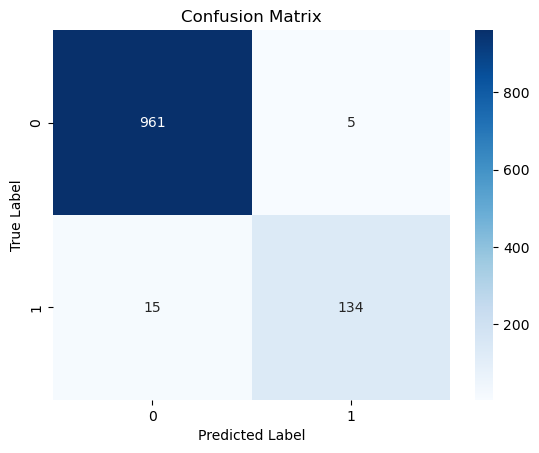

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### ROC Curve

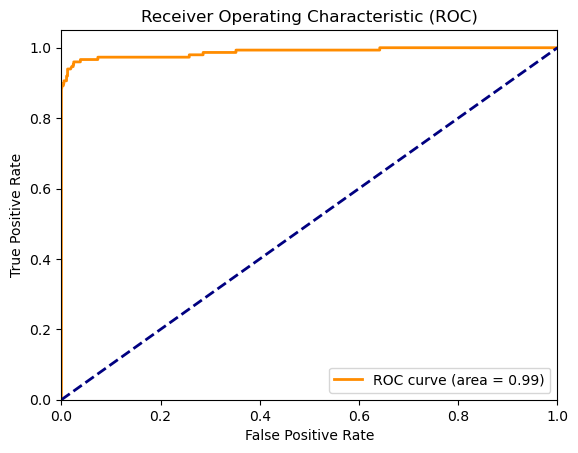

In [40]:
from sklearn.metrics import roc_curve, auc

# If the classifier provides probabilities, otherwise skip this step
y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curve

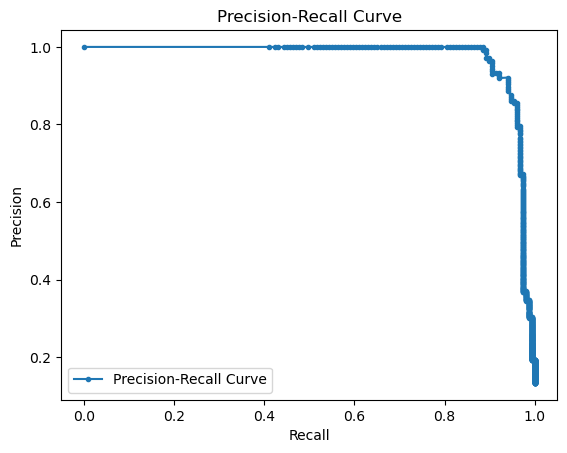

In [42]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Classification Report as a Heatmap

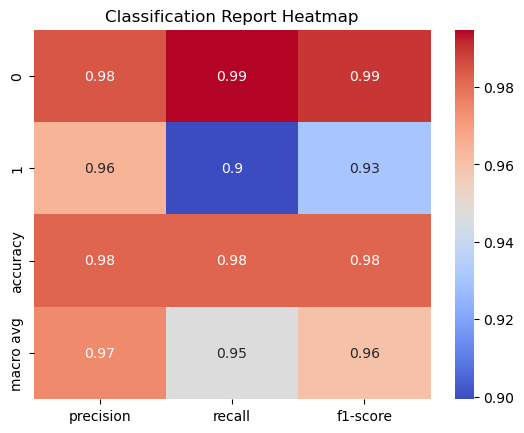

In [44]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()


### Learning Curve

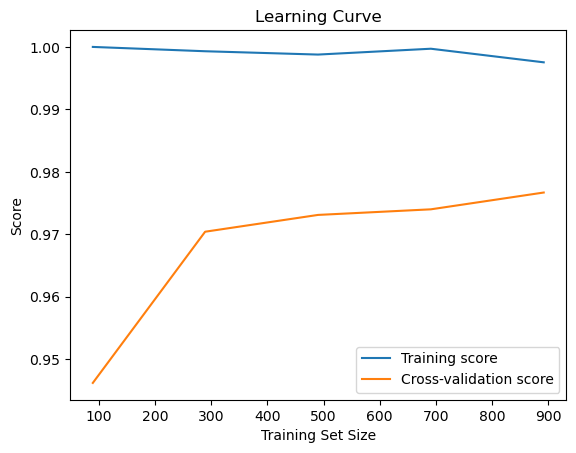

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_test, y_test, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
